<a href="https://colab.research.google.com/github/ladiff777/Computer-Vision_7th-sem/blob/main/Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOG extraction

In [1]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

(1206, 1080, 3)


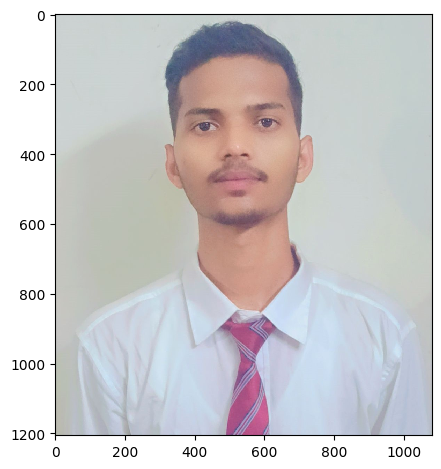

In [4]:
#reading the image
img = imread('avinash.jpeg')
imshow(img)
print(img.shape)

(128, 64, 3)


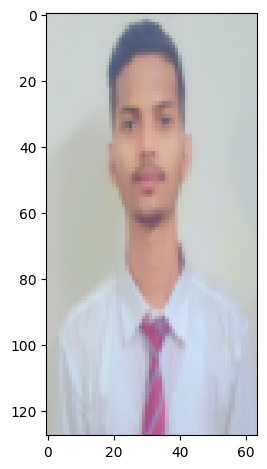

In [5]:
#resizing image
resized_img = resize(img, (128,64))
imshow(resized_img)
print(resized_img.shape)

In [6]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

<ipython-input-6-7a0be23220af>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


In [7]:
fd.shape
#Confirms number of features is correct

(3780,)

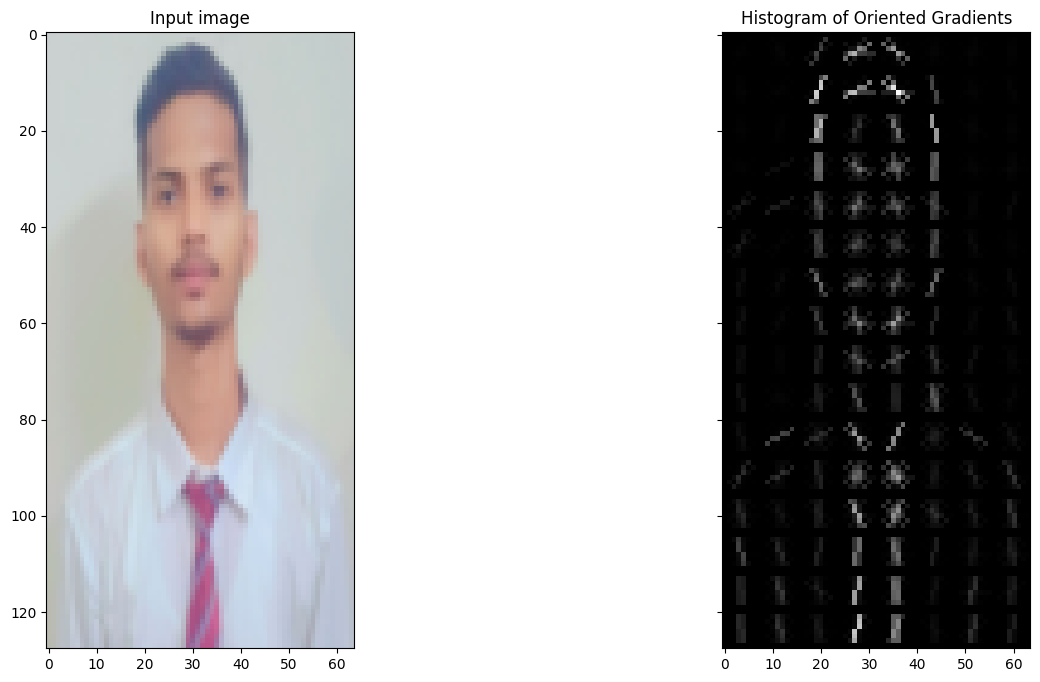

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [9]:
# save the images
plt.imsave("resized_img.jpg", resized_img)
plt.imsave("hog_image.jpg", hog_image, cmap="gray")

# LBP extraction

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(1206, 1080, 3)


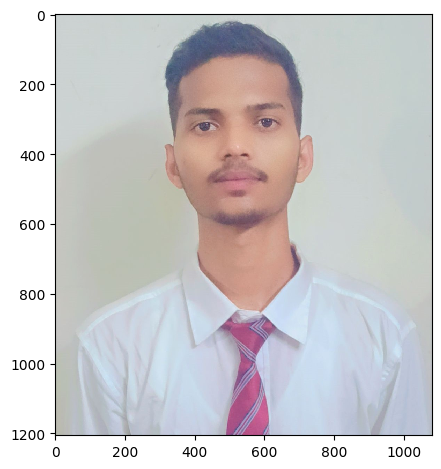

In [12]:
#reading the image
img = imread('avinash.jpeg')
imshow(img)
print(img.shape)

In [13]:
def get_pixel(img, center, x, y):

    new_value = 0

    try:
        # If local neighbourhood pixel
        # value is greater than or equal
        # to center pixel values then
        # set it to 1
        if img[x][y] >= center:
            new_value = 1

    except:
        # Exception is required when
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass

    return new_value

In [14]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

    center = img[x][y]

    val_ar = []

    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))

    # top
    val_ar.append(get_pixel(img, center, x-1, y))

    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))

    # right
    val_ar.append(get_pixel(img, center, x, y + 1))

    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))

    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))

    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))

    # left
    val_ar.append(get_pixel(img, center, x, y-1))

    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val

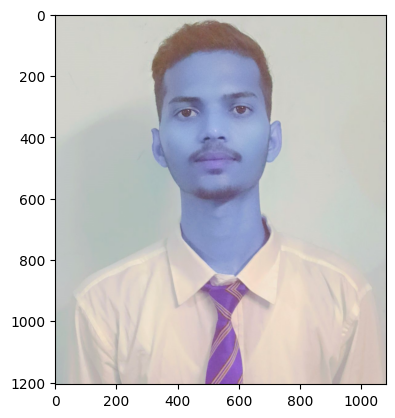

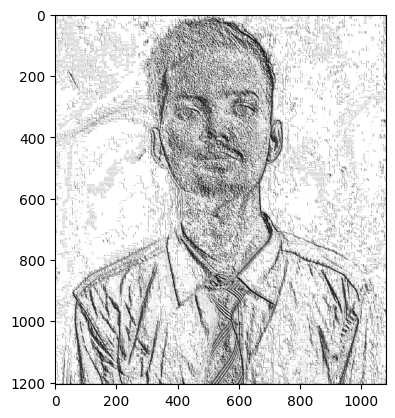

LBP Program is finished


In [16]:
path = 'avinash.jpeg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")